In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np


Kaggle:
[texto del enlace](https://www.kaggle.com/datasets/johndddddd/customer-satisfaction)

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?
Content

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [3]:
df = pd.read_csv("satisfaccion_aerolinea.csv")

In [2]:
#df.drop(columns=['Unnamed: 0'], inplace = True)

#df.to_csv('datos_completos.csv', index=False)

NameError: name 'df' is not defined

In [4]:
df

id  Gender      Customer Type  Age   Type of Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
129875   78463    Male  disloyal Customer   34  Business travel  Business   
129876   71167    Male     Loyal Customer   23  Business travel  Business   
129877   37675  Female     Loyal Customer   17  Personal Travel       Eco   
129878   90086    Male     Loyal Customer   14  Business travel  Business   
129879   34799  Female     Loyal Customer   42  Personal Travel       Eco   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
129875              526                      3   
129876              646                      4   
129877              828                      2   
129878             1127                      3   
129879              264                      2   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
129875                                  3                       3  ...   
129876                                  4                       4  ...   
129877                                  5                       1  ...   
129878                                  3                       3  ...   
129879                                  5                       2  ...   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
129875                       4                 3                 2   
129876                       4                 4                 5   
129877                       2                 4                 3   
129878                       4                 3                 2   
129879                       1                 1                 2   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
129875                 4                4                 5            4   
129876                 5                5                 5            4   
129877                 4                5                 4            2

In [5]:
satisfechos = df[df['satisfaction'] == 'satisfied'].count()

insatisfechos = df[df['satisfaction'] == 'neutral or dissatisfied'].count()

#print("Satisfechos: ", satisfechos)
#print("Insatisfechos: ", insatisfechos)

df['Arrival Delay in Minutes'].fillna(0, inplace = True)

df.drop(columns=['id'], inplace=True)

columnas = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for col in columnas:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes


<ipython-input-5-2d201c306d51>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(0, inplace = True)


In [6]:
df

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              0   13               1      2              460   
1            1              1   25               0      0              235   
2            0              0   26               0      0             1142   
3            0              0   25               0      0              562   
4            1              0   61               0      0              214   
...        ...            ...  ...             ...    ...              ...   
129875       1              1   34               0      0              526   
129876       1              0   23               0      0              646   
129877       0              0   17               1      1              828   
129878       1              0   14               0      0             1127   
129879       0              0   42               1      1              264   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
129875                      3                                  3   
129876                      4                                  4   
129877                      2                                  5   
129878                      3                                  3   
129879                      2                                  5   

        Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                            3              1  ...                       5   
1                            3              3  ...                       1   
2                            2              2  ...                       5   
3                            5              5  ...                       2   
4                            3              3  ...                       3   
...                        ...            ...  ...                     ...   
129875                       3              1  ...                       4   
129876                       4              4  ...                       4   
129877                       1              5  ...                       2   
129878                       3              3  ...                       4   
129879                       2              5  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
129875                 3                 2                 4                4   
129876                 4                 5                 5                5   
129877                 4                 3                 4                5   
129878                 3                 2                 5                4   
129879                 1                 2                 1                1   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   

In [7]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

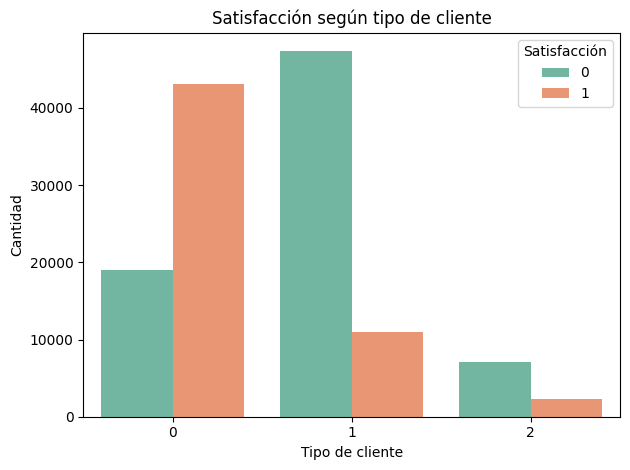

In [ ]:
import seaborn as sns
# Agrupamos por tipo de cliente y nivel de satisfacción
sns.countplot(data=df, x='Class', hue='satisfaction', palette='Set2')

plt.title('Satisfacción según tipo de cliente')
plt.xlabel('Tipo de cliente')
plt.ylabel('Cantidad')
plt.legend(title='Satisfacción')
plt.tight_layout()
plt.show()

## Entrenamiento del modelo

In [11]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# Entrenamiento: 20 % de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Escalar features con StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#Reducir la dimensionalidad del dataset, manteniendo un 95% de la varianza.
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Random Forest

In [13]:
rfm = RandomForestClassifier(n_estimators=10, random_state=42)

In [14]:
rfm.fit(X_train, y_train)
y_pred_rfm = rfm.predict(X_test)

Accuracy de Random Forest: 0.96
Error Cuadrático Medio (mse): 0.04
Error Absoluto Medio (mse): 0.04
Coeficiente de Determinacion (R2): 0.83
Matriz de confusión Random Forest:
[[14339   283]
 [  831 10523]]


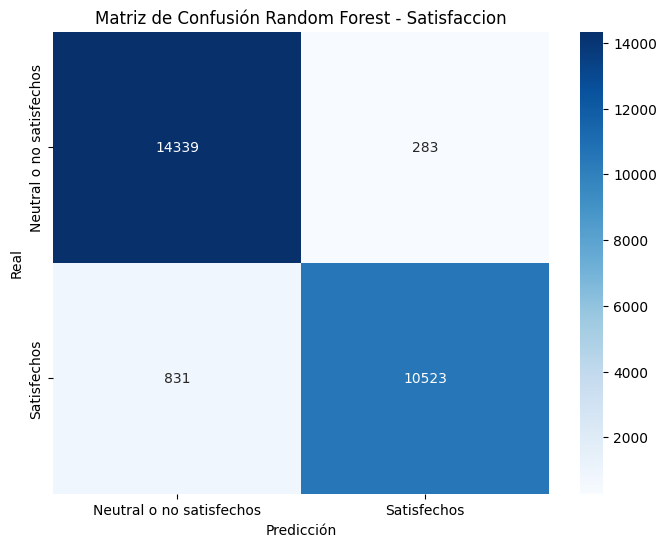

Porcentaje de errores tipo FN (predijo no satisfecho pero era satisfecho): 1.94%
Porcentaje de errores tipo FP (predijo satisfecho pero era no satisfecho): 7.32%


In [15]:
# Evaluación de Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Accuracy de Random Forest: {accuracy_score(y_test, y_pred_rfm):.2f}")
print(f"Error Cuadrático Medio (mse): {mean_squared_error(y_test, y_pred_rfm):.2f}")
print(f"Error Absoluto Medio (mse): {mean_absolute_error(y_test, y_pred_rfm):.2f}")
print(f"Coeficiente de Determinacion (R2): {r2_score(y_test, y_pred_rfm):.2f}")


cm = confusion_matrix(y_test, y_pred_rfm)
print("Matriz de confusión Random Forest:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Neutral o no satisfechos", "Satisfechos"], yticklabels=["Neutral o no satisfechos", "Satisfechos"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión Random Forest - Satisfaccion")
plt.show()

# Extraemos los valores
TP = cm[0, 0]  # Verdaderos positivos
FN = cm[0, 1]  # Falsos negativos
FP = cm[1, 0]  # Falsos positivos
TN = cm[1, 1]  # Verdaderos negativos

# Porcentaje de errores tipo FN
fn_rate = FN / (TP + FN) * 100

# Porcentaje de errores tipo FP
fp_rate = FP / (FP + TN) * 100

# Mostrar resultados
print(f"Porcentaje de errores tipo FN (predijo no satisfecho pero era satisfecho): {fn_rate:.2f}%")
print(f"Porcentaje de errores tipo FP (predijo satisfecho pero era no satisfecho): {fp_rate:.2f}%")

In [ ]:
feature_importances = pd.Series(rfm.feature_importances_, index=X_train.columns)

feature_importances_percent = (feature_importances * 100).round(2)

# Ordenar de mayor a menor
feature_importances_percent_sorted = feature_importances_percent.sort_values(ascending=False)

# Mostrar
print("Importancia de características (%):")
print(feature_importances_percent_sorted)

Importancia de características (%):
Class                                16.25
Online boarding                      14.55
Inflight wifi service                13.32
Type of Travel                        7.81
Inflight entertainment                5.99
Seat comfort                          4.12
Ease of Online booking                4.01
Age                                   3.49
Customer Type                         3.44
Flight Distance                       3.37
Inflight service                      3.15
Checkin service                       3.14
Baggage handling                      2.78
Cleanliness                           2.70
Leg room service                      2.25
On-board service                      2.23
Gate location                         1.80
Departure/Arrival time convenient     1.47
Arrival Delay in Minutes              1.30
Food and drink                        1.26
Departure Delay in Minutes            1.13
Gender                                0.46
dtype: float64


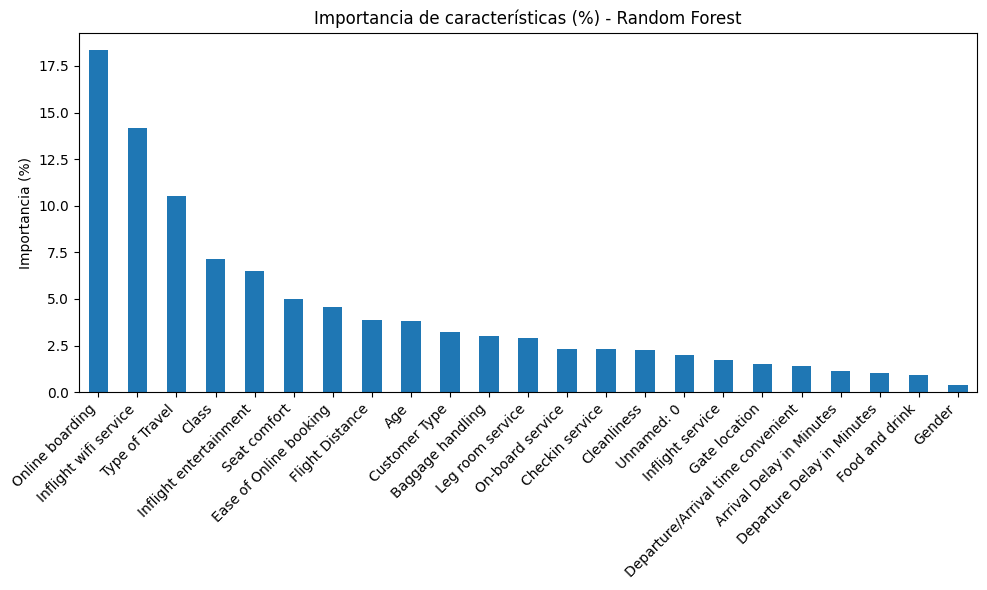

In [ ]:
# Crear gráfico de barras
plt.figure(figsize=(10, 6))
feature_importances_percent_sorted.plot(kind='bar')
plt.title('Importancia de características (%) - Random Forest')
plt.ylabel('Importancia (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-38-1f3250fb4d82>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance (%)', y='Feature', palette='Blues_d')


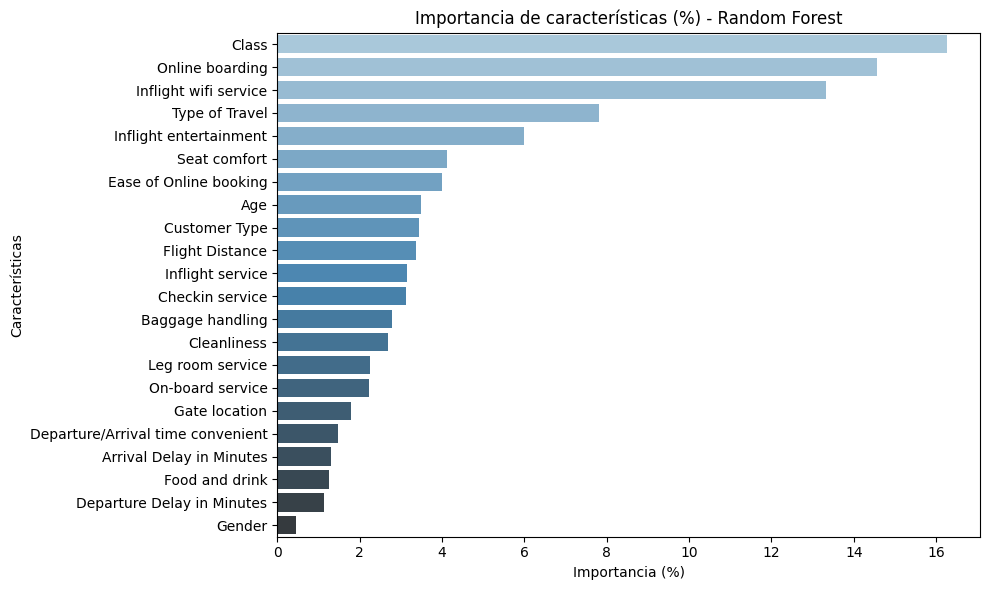

In [ ]:
# Convertir a DataFrame para usar con seaborn
importance_df = feature_importances_percent_sorted.reset_index()
importance_df.columns = ['Feature', 'Importance (%)']

# Crear gráfico con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance (%)', y='Feature', palette='Blues_d')
plt.title('Importancia de características (%) - Random Forest')
plt.xlabel('Importancia (%)')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

# Decision Tree Clasifier

In [ ]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train_pca, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc = dtc.predict(X_test_pca)

In [ ]:
print("Precisión del modelo de arbol:", accuracy_score(y_test, y_pred_dtc))

Precisión del modelo de arbol: 0.8877938609998973


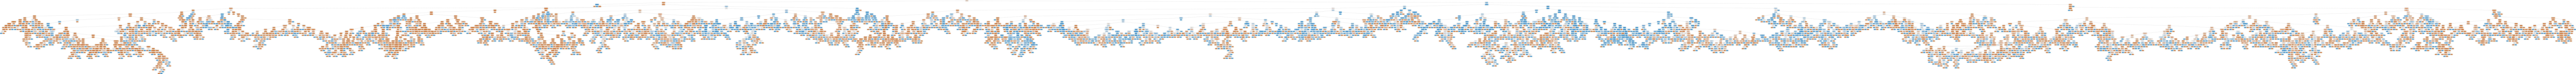

In [ ]:
# Visualizamos el Arbol que ha usado el modelo
import pydot
from IPython.display import Image
from sklearn import tree

from io import StringIO
dot_data = StringIO()

tree.export_graphviz(dtc, out_file = dot_data, proportion = True,
                     feature_names = X_train.columns,
                     rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# SVM

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy SIN PCA:", accuracy_score(y_test, y_pred))

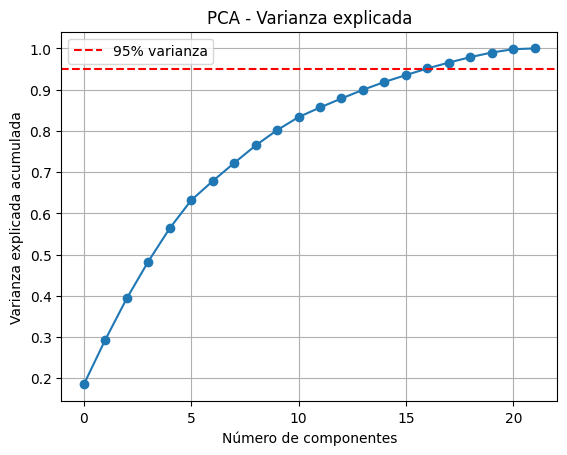

In [ ]:
pca_check = PCA().fit(X_train_scaled)

plt.plot(np.cumsum(pca_check.explained_variance_ratio_), marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.axhline(0.95, color='r', linestyle='--', label="95% varianza")
plt.title("PCA - Varianza explicada")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

svm_model = svm.SVC(kernel='linear')

results = permutation_importance(svm_model.fit(X_train, y_train), X_test, y_test, n_repeats=10, random_state=42)

for i, importance in enumerate(results.importances_mean):
    print(f"Feature {i+1}: {importance}")

In [ ]:
# Elegimos 20 componentes que capturan el 95% de la varianza.
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
svm_pca = SVC(kernel='rbf')
svm_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_pca.predict(X_test_pca)

In [ ]:
print("Accuracy CON PCA:", accuracy_score(y_test, y_pred_pca))

Accuracy CON PCA: 0.9536595928973581


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)
print("Accuracy LOGISTIC REGRESSION sin PCA:", accuracy_score(y_test, y_pred_log))

Accuracy LOGISTIC REGRESSION sin PCA: 0.8777729656898128


In [ ]:
logreg_pca = LogisticRegression(max_iter=1000)
logreg_pca.fit(X_train_pca, y_train)
y_pred_log_pca = logreg_pca.predict(X_test_pca)
print("Accuracy LOGISTIC REGRESSION con PCA:", accuracy_score(y_test, y_pred_log_pca))

Accuracy LOGISTIC REGRESSION con PCA: 0.8764255810596218


# KNN

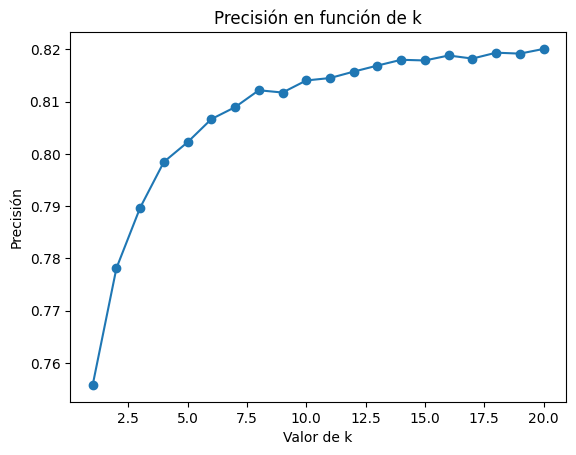

In [ ]:
# Probar diferentes valores de k

valoraciones = [] #Para guardar las valoraciones
rango_k = range(1, 21)  # Probar k de 1 a 20

# Probamos para todo el rango de K y guardamos las valoraciones
for k in rango_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    y_pred_k = knn.predict(X_test_pca)
    valoraciones.append(accuracy_score(y_test, y_pred_k))

# Hacemos un gráfico con las valoraciones
plt.plot(rango_k, valoraciones, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.title('Precisión en función de k')
plt.show()

In [ ]:
mejor_k = rango_k[np.argmax(valoraciones)]
print(f"El mejor valor de k es: {mejor_k}")

El mejor valor de k es: 20


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [ ]:
knn_model.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred_knn = knn_model.predict(X_test_pca)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:
print(f"Precisión del modelo KNN: {accuracy_score(y_test, y_pred_knn):.2f}")

Precisión del modelo KNN: 0.82


# GRAFICOS

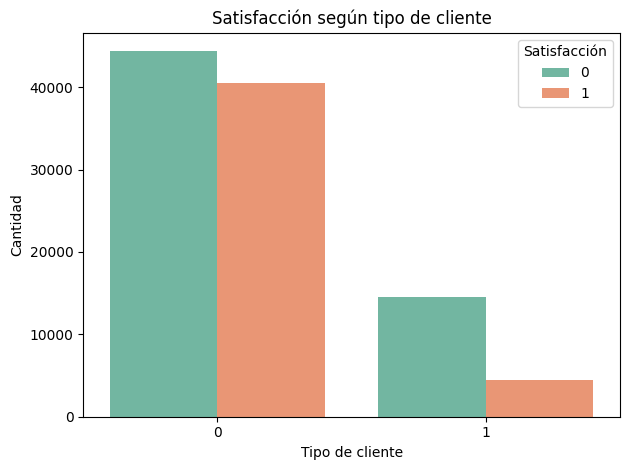

In [ ]:
import seaborn as sns
# Agrupamos por tipo de cliente y nivel de satisfacción
sns.countplot(data=df, x='Customer Type', hue='satisfaction', palette='Set2')

plt.title('Satisfacción según tipo de cliente')
plt.xlabel('Tipo de cliente')
plt.ylabel('Cantidad')
plt.legend(title='Satisfacción')
plt.tight_layout()
plt.show()

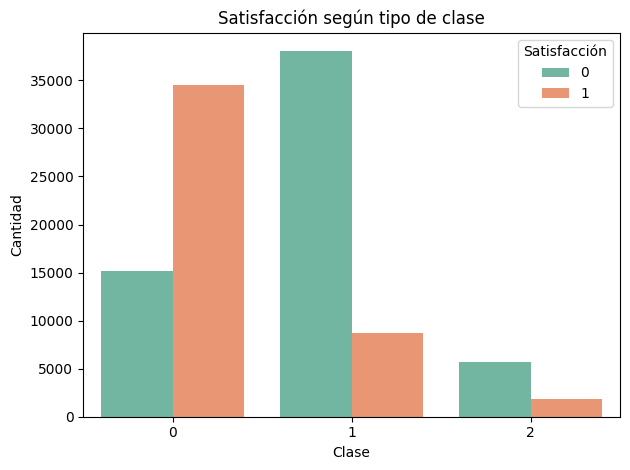

In [ ]:
sns.countplot(data=df, x='Class', hue='satisfaction', palette='Set2')

plt.title('Satisfacción según tipo de clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.legend(title='Satisfacción')
plt.tight_layout()
plt.show()

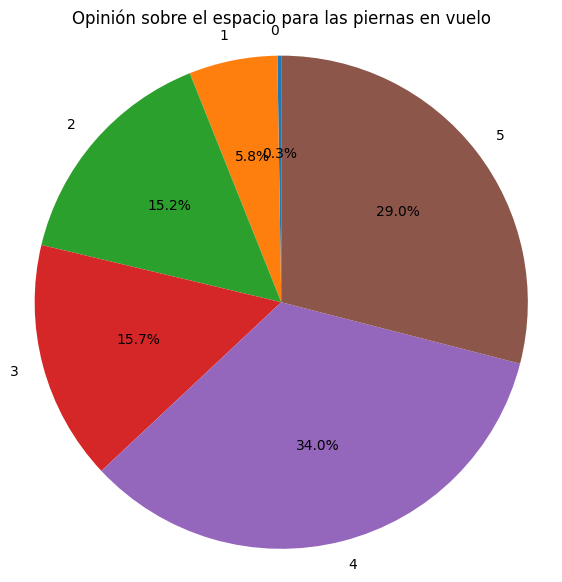

In [ ]:
import matplotlib.pyplot as plt

# Filtramos solo los pasajeros no satisfechos
Business = df[df['Class'] == 0]

# Contamos la cantidad de opiniones por nivel de servicio de wifi
wifi_counts = Business['Leg room service'].value_counts().sort_index()

# Creamos el gráfico circular
plt.figure(figsize=(7, 7))
plt.pie(wifi_counts, labels=wifi_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Opinión sobre el espacio para las piernas en vuelo')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

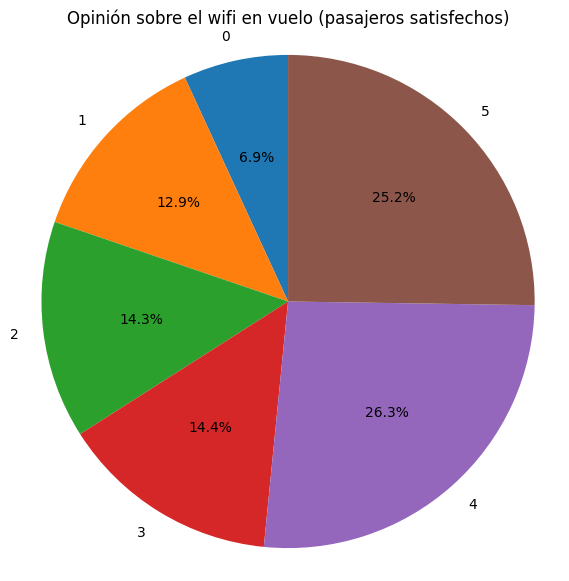

In [ ]:
import matplotlib.pyplot as plt

# Filtramos solo los pasajeros no satisfechos
no_satisfechos = df[df['satisfaction'] == 1]

# Contamos la cantidad de opiniones por nivel de servicio de wifi
wifi_counts = no_satisfechos['Inflight wifi service'].value_counts().sort_index()

# Creamos el gráfico circular
plt.figure(figsize=(7, 7))
plt.pie(wifi_counts, labels=wifi_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Opinión sobre el wifi en vuelo (pasajeros satisfechos)')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Filtramos solo los pasajeros no satisfechos
no_satisfechos = df[df['satisfaction'] == 1]

# Contamos la cantidad de opiniones por nivel de servicio de wifi
wifi_counts = no_satisfechos['Inflight wifi service'].value_counts().sort_index()

# Creamos el gráfico circular
plt.figure(figsize=(7, 7))
plt.pie(wifi_counts, labels=wifi_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Opinión sobre el wifi en vuelo (pasajeros satisfechos)')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

Satisfechos: 11403
No satisfechos: 14573


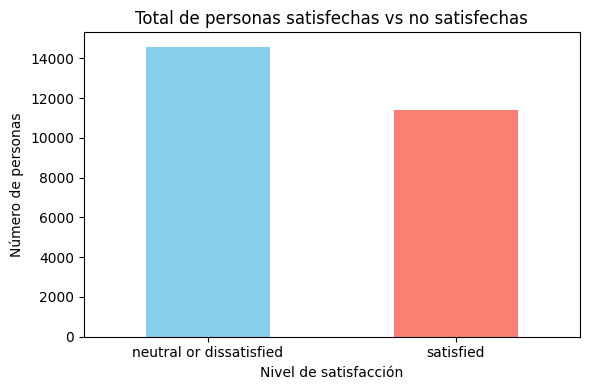

In [ ]:
import matplotlib.pyplot as plt

# Contar cuántas personas están satisfechas y cuántas no
satisfaction_counts = df_test['satisfaction'].value_counts()

satisfechos = satisfaction_counts['satisfied']
no_satisfechos = satisfaction_counts['neutral or dissatisfied']

print("Satisfechos:", satisfechos)
print("No satisfechos:", no_satisfechos)

# Gráfico de barras
plt.figure(figsize=(6,4))
satisfaction_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total de personas satisfechas vs no satisfechas')
plt.xlabel('Nivel de satisfacción')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()